In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("Human_Resources.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df['Attrition']=df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x:1 if x == 'Y' else 0)

In [7]:
df[['Attrition','OverTime','Over18']]

,Attrition,OverTime,Over18
0,1,1,1
1,0,0,1
2,1,1,1
3,0,1,1
4,0,0,1
...,...,...,...
1465,0,0,1
1466,0,0,1
1467,0,1,1
1468,0,0,1


<Axes: >

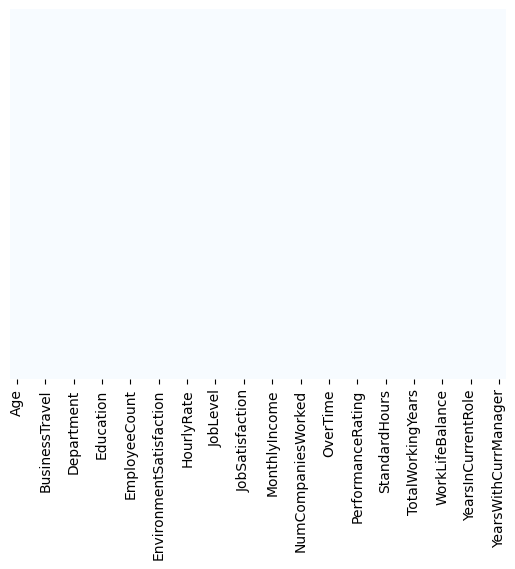

In [8]:
# Checking if there are any missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
# Seems to not have any missing data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

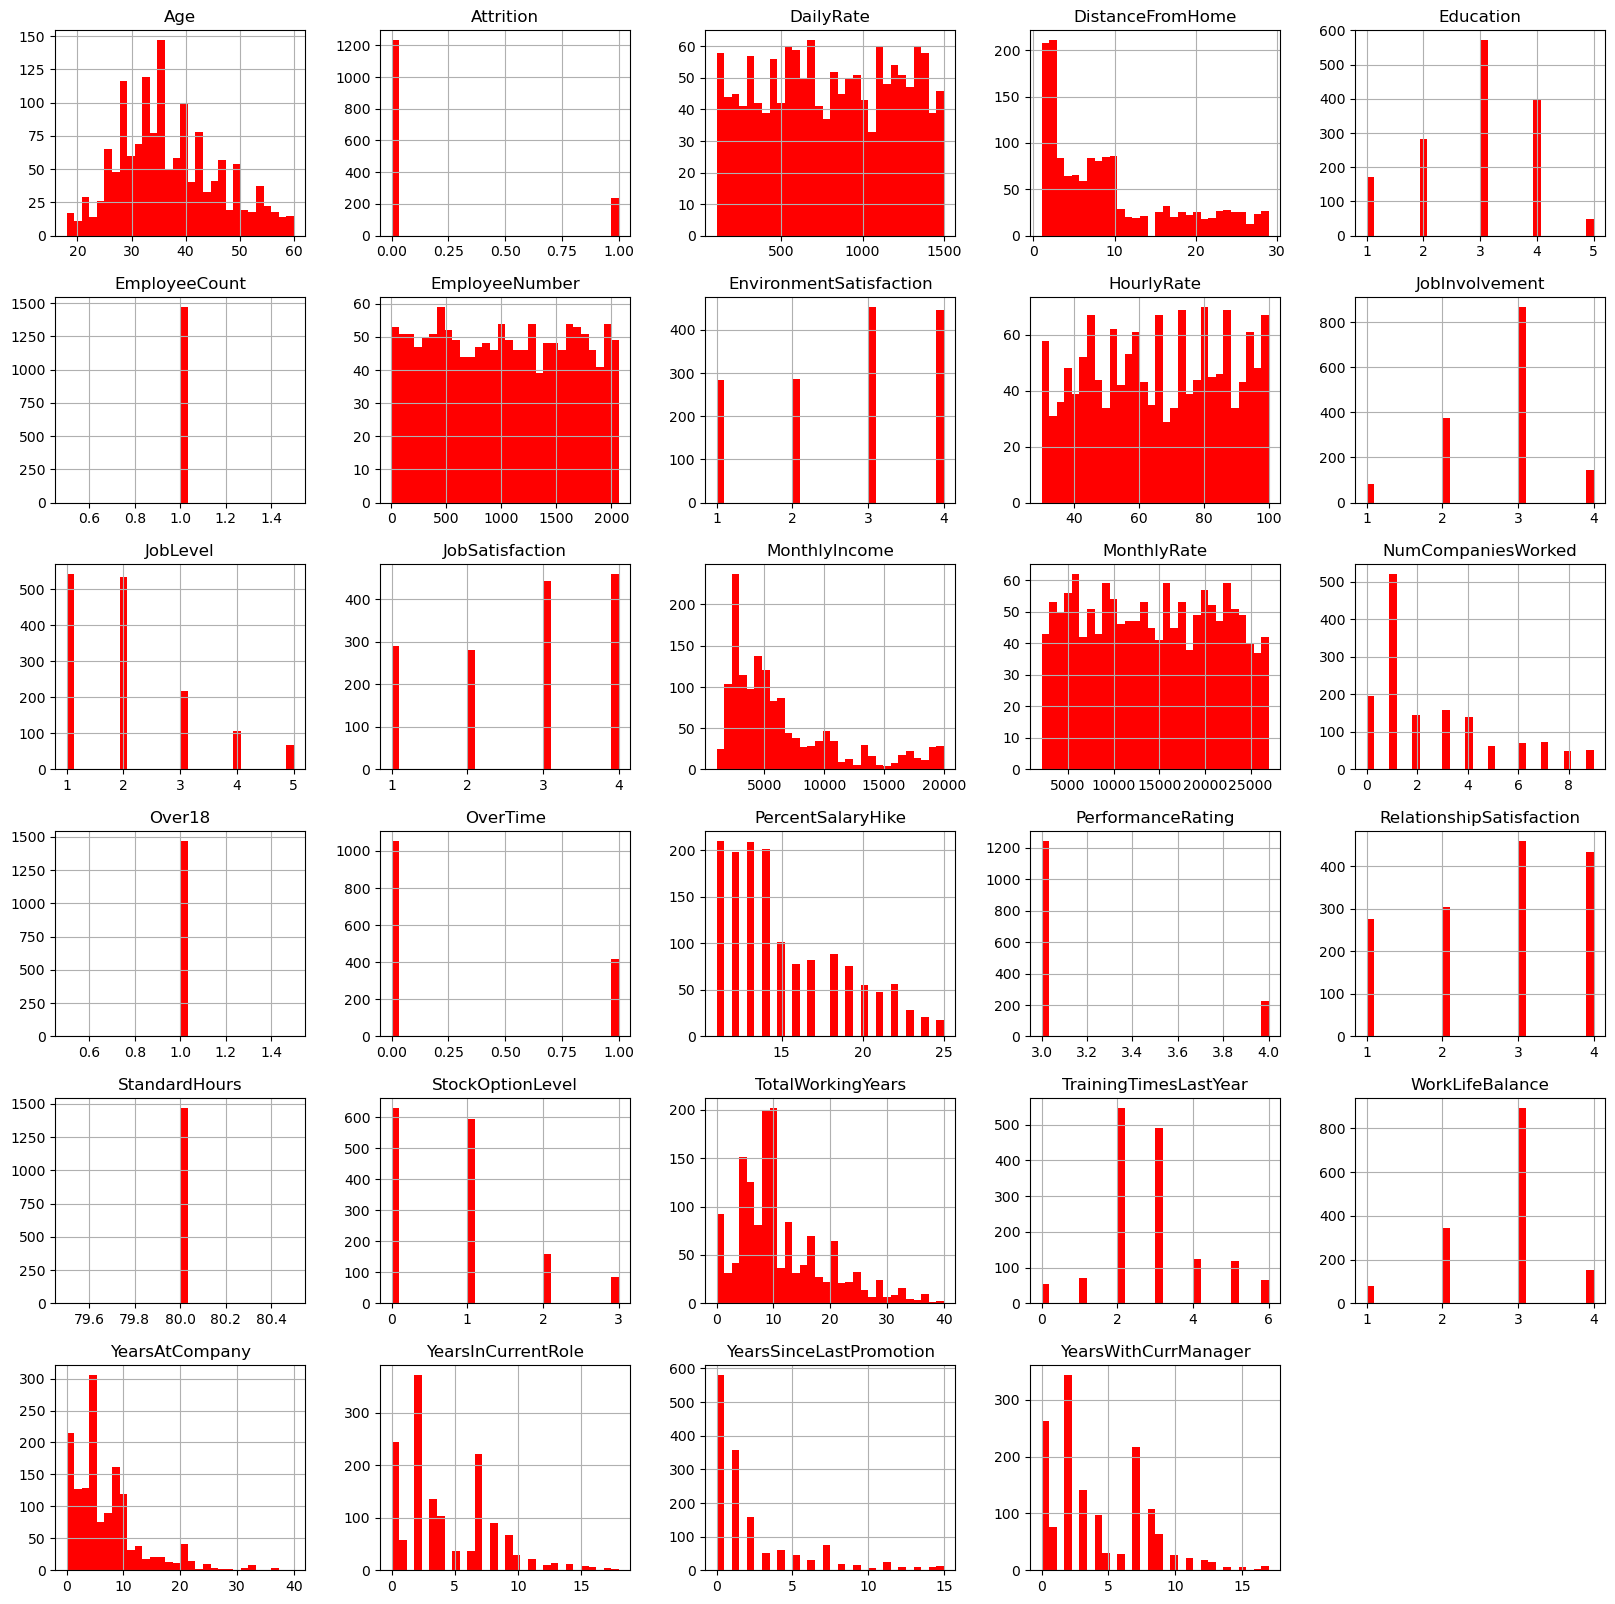

In [9]:
from turtle import color


df.hist(bins=30, figsize=(20,20), color='r')

In [10]:
# We can observe that the features "EmployeeCount", "StandardHours", "Over18", "EmployeeNumber" are constant across all the observations.
# Let us drop those columns.
df.drop(['EmployeeCount', 'StandardHours','Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [12]:
# How many employees left the company?
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

In [13]:
left_df.head()
stayed_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0


In [14]:
# Number of employees who left and stayed, lets look at percentage as well
# Total
print('Total', len(df))

# Number of employees that left
print('Number of employees that left', len(left_df))

# % of employees that left
print('% of employees that left', 100 * (len(left_df) / len(df)),'%')

# Number of employees that stayed
print('Number of employees that stayed', len(stayed_df))

# % of employees that stayed
print('% of employees that stayed', 100 * (len(stayed_df) / len(df)),'%')

Total 1470
Number of employees that left 237
% of employees that left 16.122448979591837 %
Number of employees that stayed 1233
% of employees that stayed 83.87755102040816 %


In [15]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Looking at some features from comparing the two groups**
***
1. Age <br>
mean age of employees that stayed > mean age of employees that left 

2. Daily Rate<br>
mean daily rate of employees that stayed > mean daily rate of employees that left

3. Distance From Home<br>
mean distance from home of employees that stayed < mean distance from home of employees that left

4. Environment Satisfaction<br>
mean Environment Satisfaction that stayed > mean Environment Satisfaction of employees that left

5. Stock Option Level<br>
mean Stock Option Level that stayed > mean Stock Option Level of employees that left


In [17]:
# Trying to convert categorical data into numeric form
# df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: 0 if x == "Travel_Rarely" else (1 if x == "Travel_Frequently" else 2))

# Encoding

In [18]:
# Better way to do encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [19]:
df_encoded.drop(['EmployeeCount', 'StandardHours','Over18', 'EmployeeNumber'], axis = 1, inplace = True)

KeyError: "['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'] not found in axis"

<Axes: >

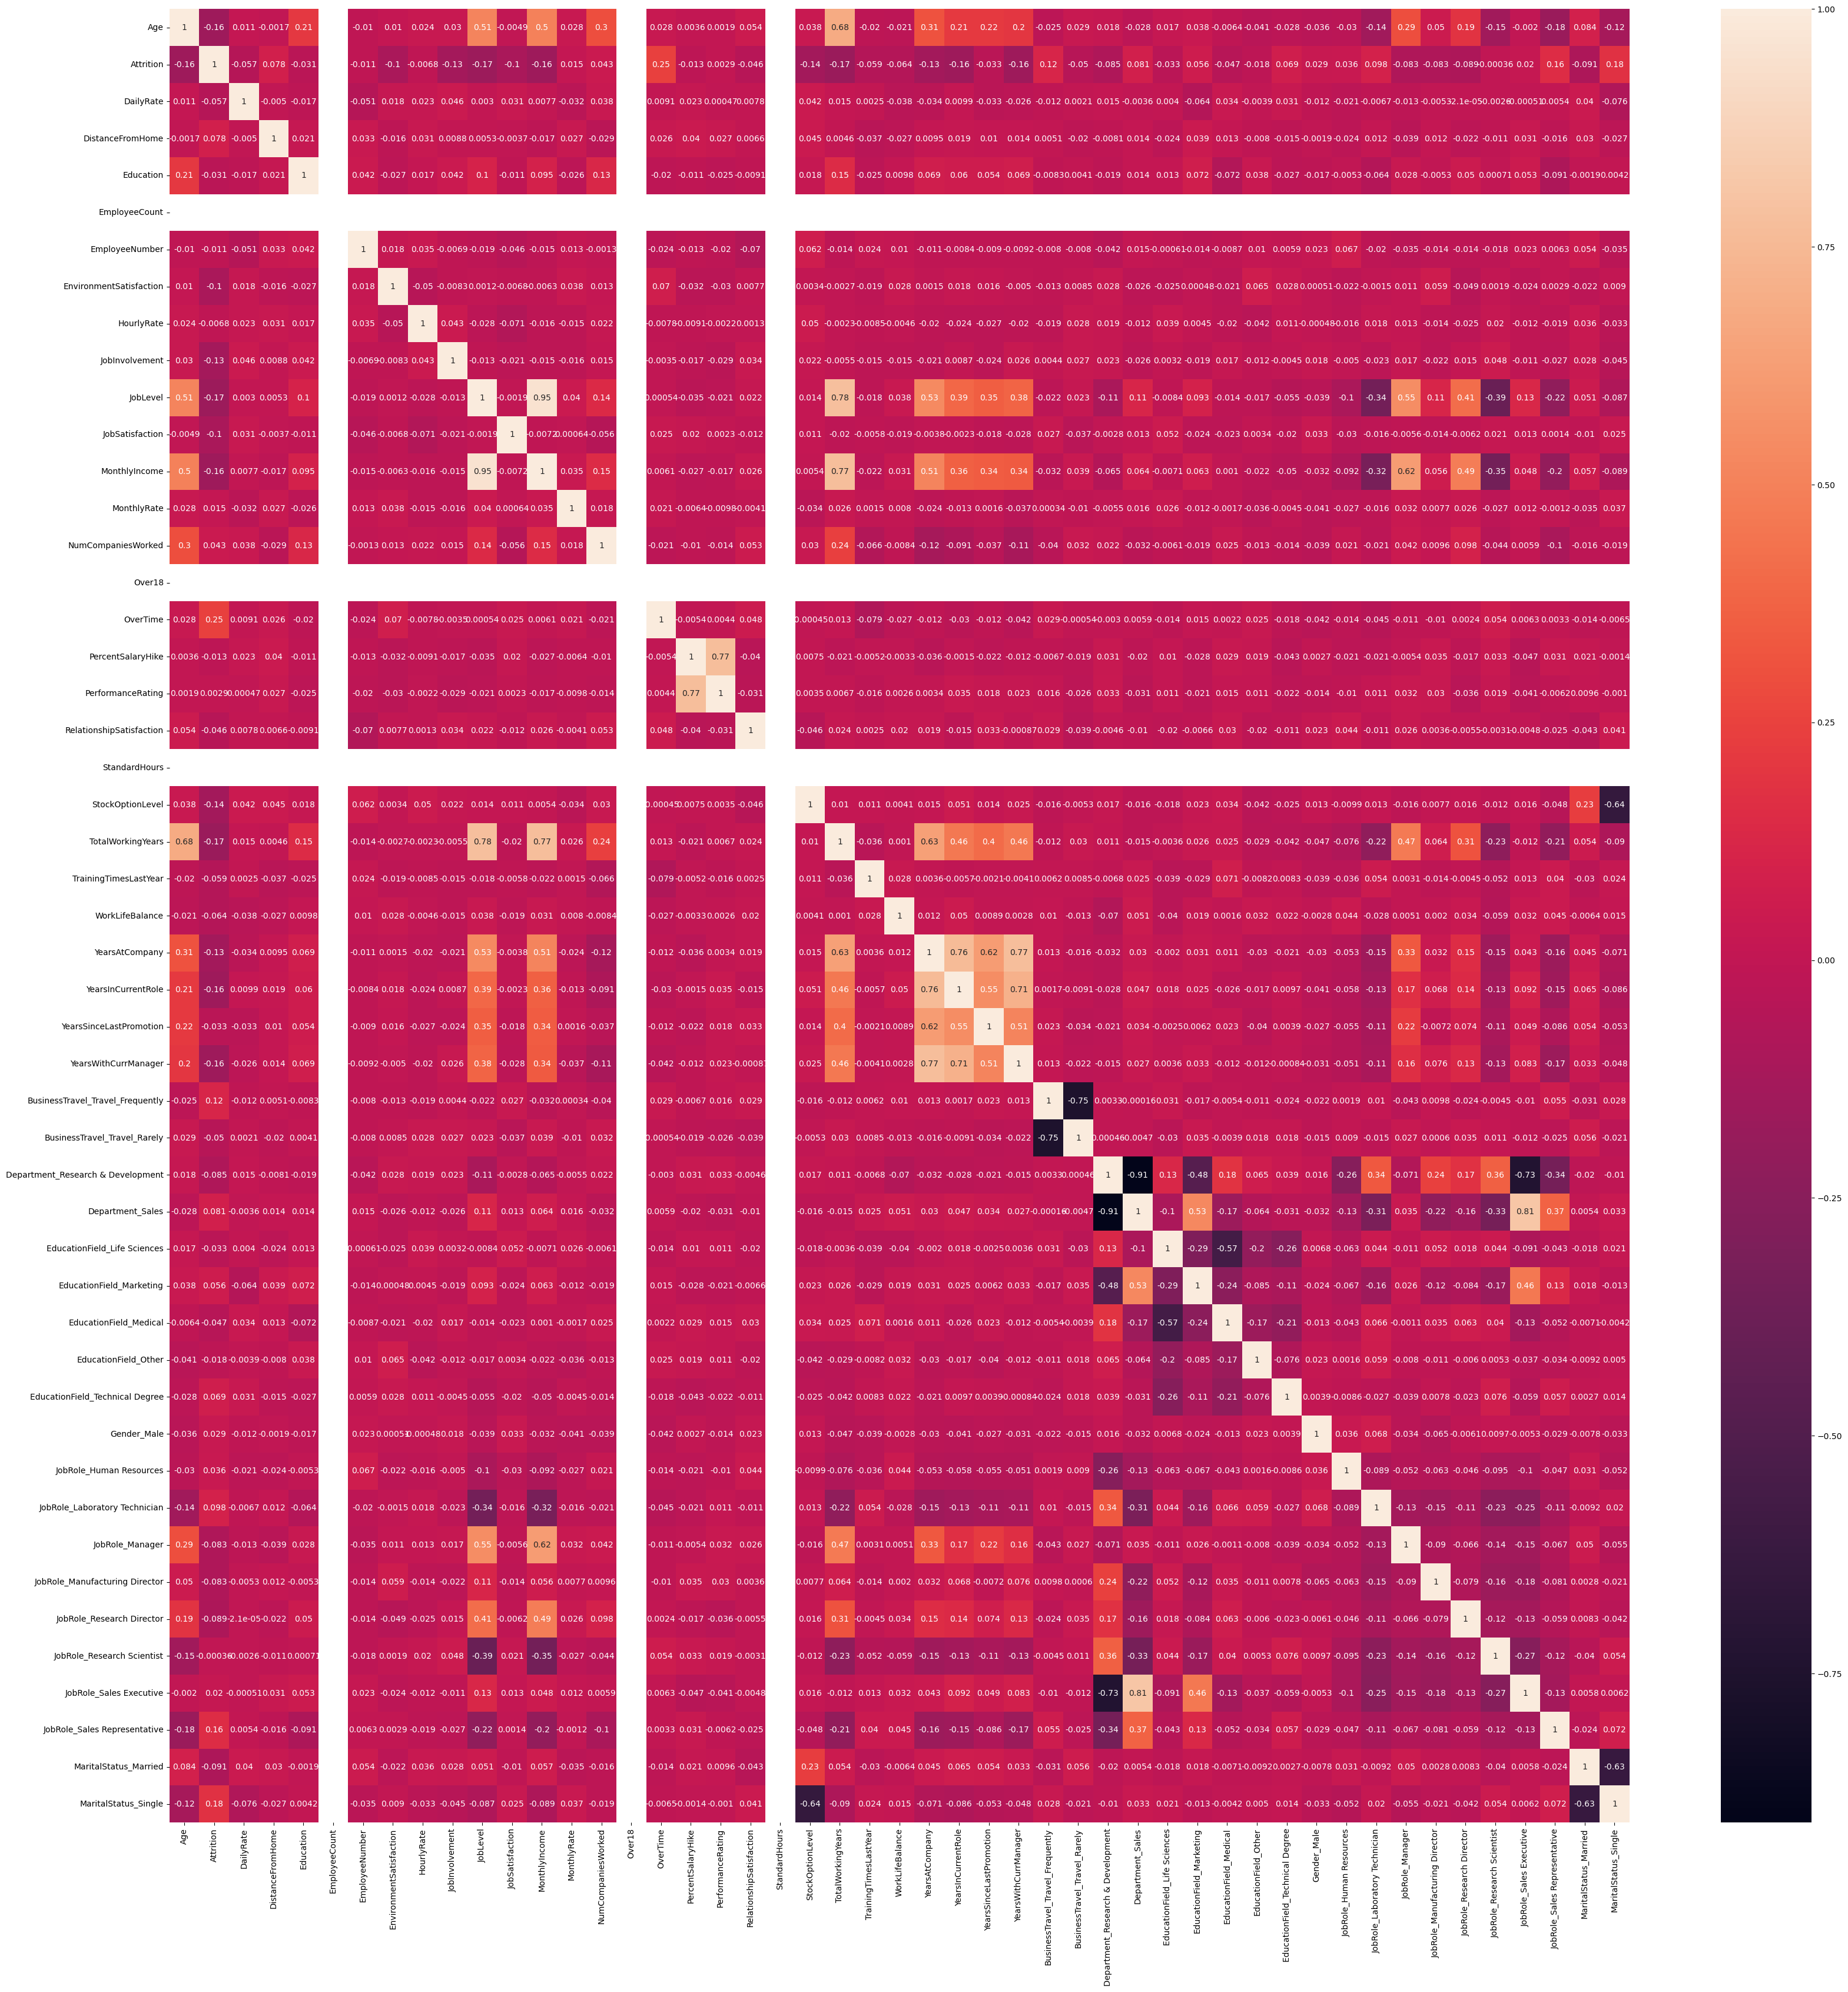

In [ ]:
correlations_encoded = df_encoded.corr()
f, ax = plt.subplots(figsize = (40,40))
sns.heatmap(correlations_encoded, annot = True)
plt.show()

# Filter only numeric columns

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

<Axes: >

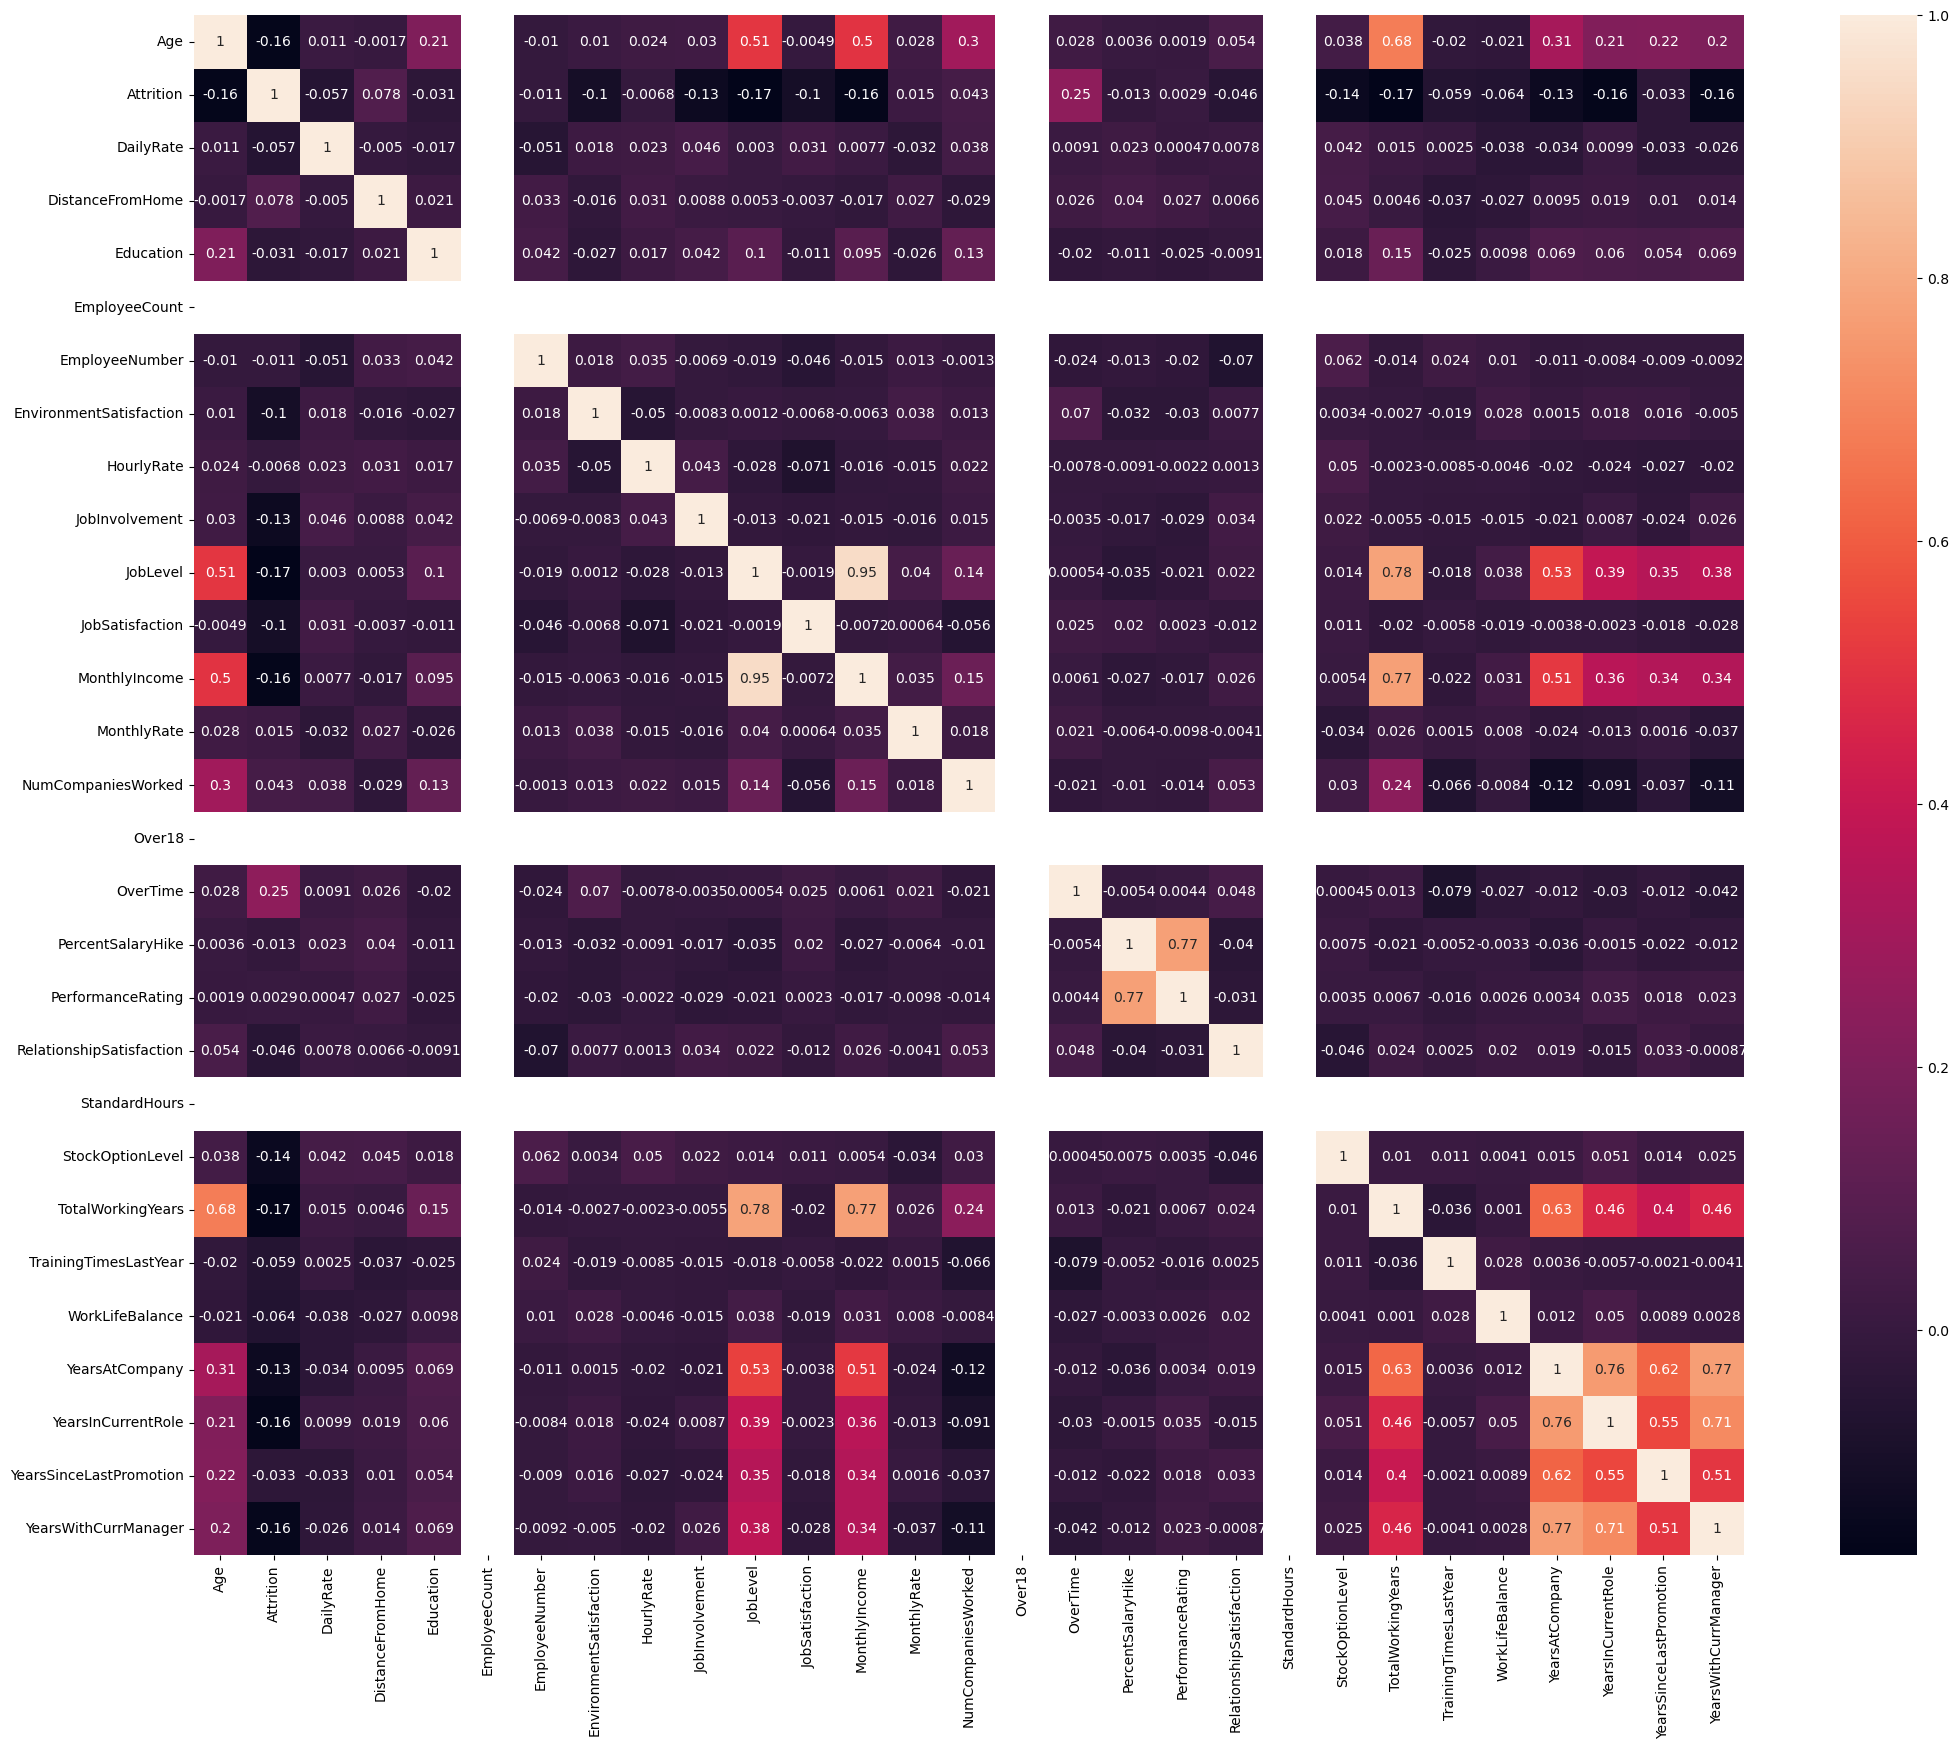

In [ ]:
correlations = numeric_df.corr()
f, ax = plt.subplots(figsize = (25,20))
sns.heatmap(correlations, annot = True)
plt.show()

# Lets look at AGE and ATTRITION

<Figure size 2500x1200 with 0 Axes>

<Axes: xlabel='Age', ylabel='count'>

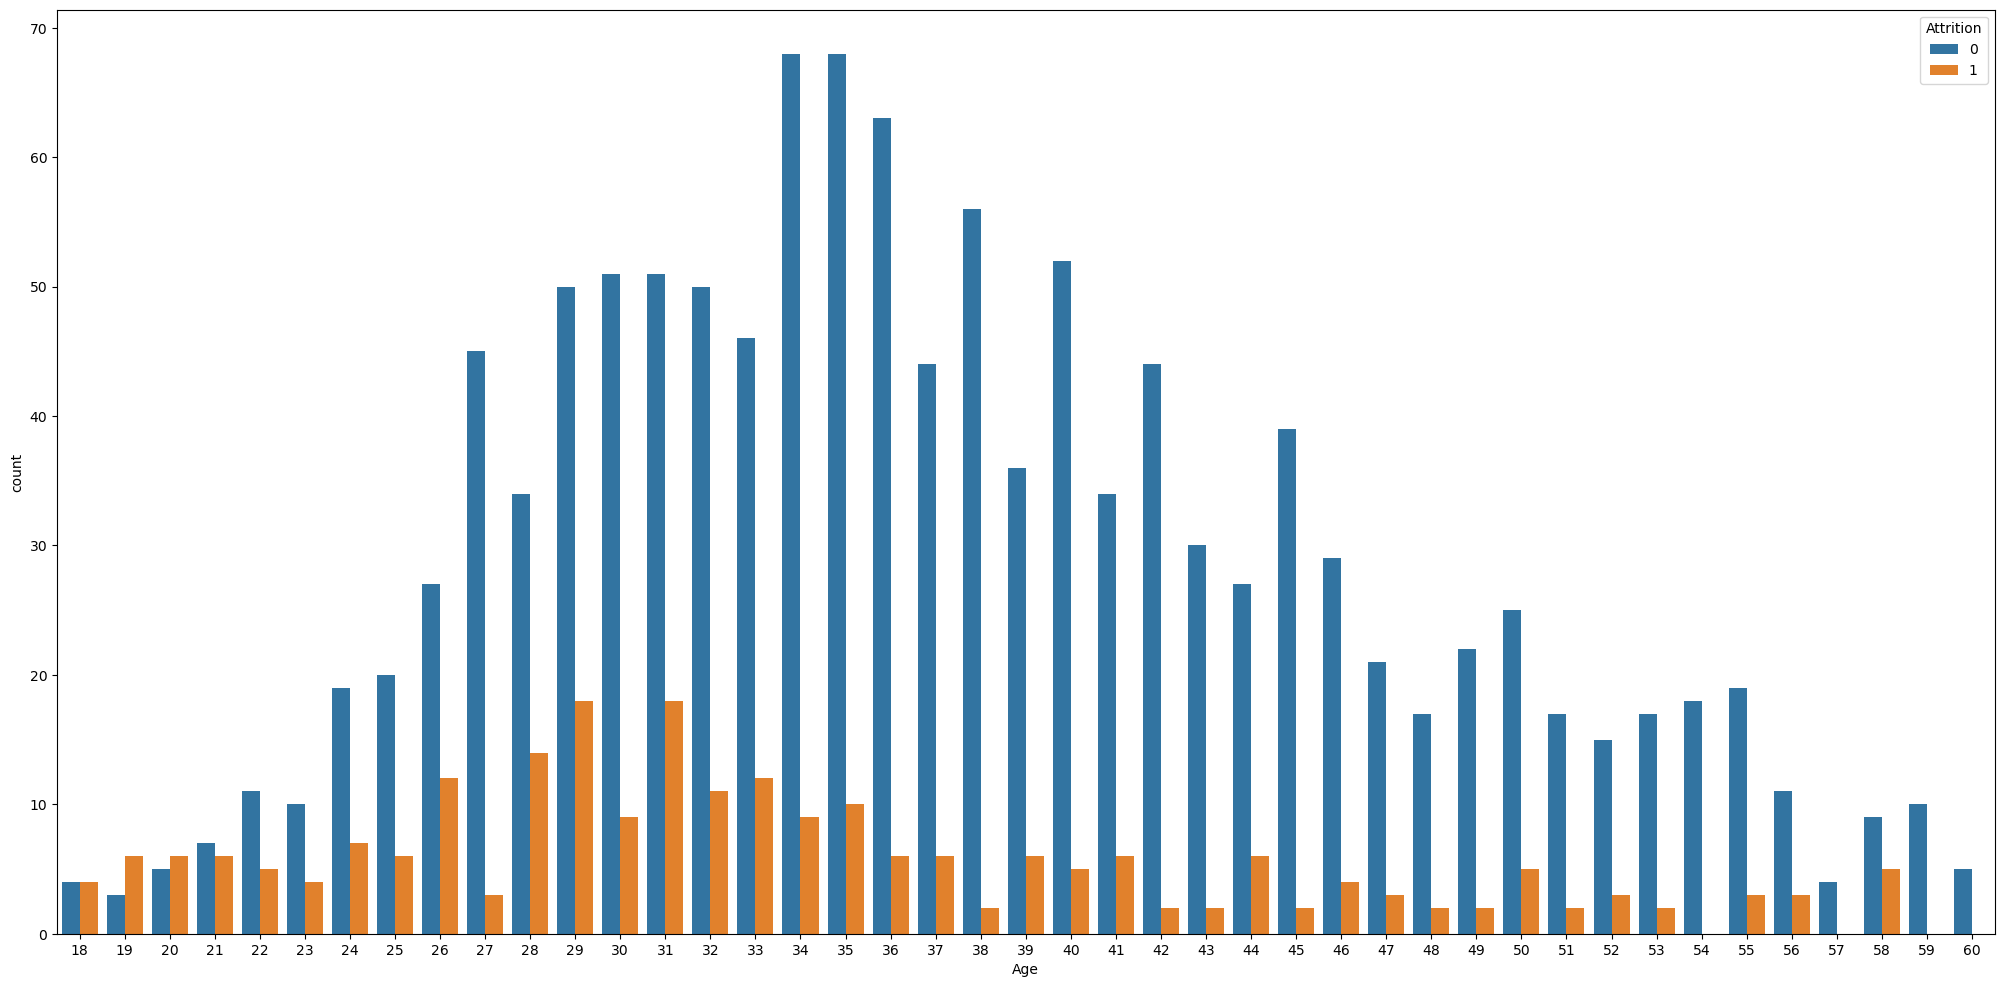

In [25]:
plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = df)
plt.show()
# 0 indicates stayed, 1 indicates left

<Figure size 2000x2000 with 0 Axes>

<Axes: >

<Axes: xlabel='JobRole', ylabel='count'>

Text(0.5, 1.0, 'JobRole vs Attrition')

<Axes: >

<Axes: xlabel='MaritalStatus', ylabel='count'>

Text(0.5, 1.0, 'MaritalStatus vs Attrition')

<Axes: >

<Axes: xlabel='JobInvolvement', ylabel='count'>

Text(0.5, 1.0, 'JobInvolvement vs Attrition')

<Axes: >

<Axes: xlabel='JobLevel', ylabel='count'>

Text(0.5, 1.0, 'JobLevel vs Attrition')

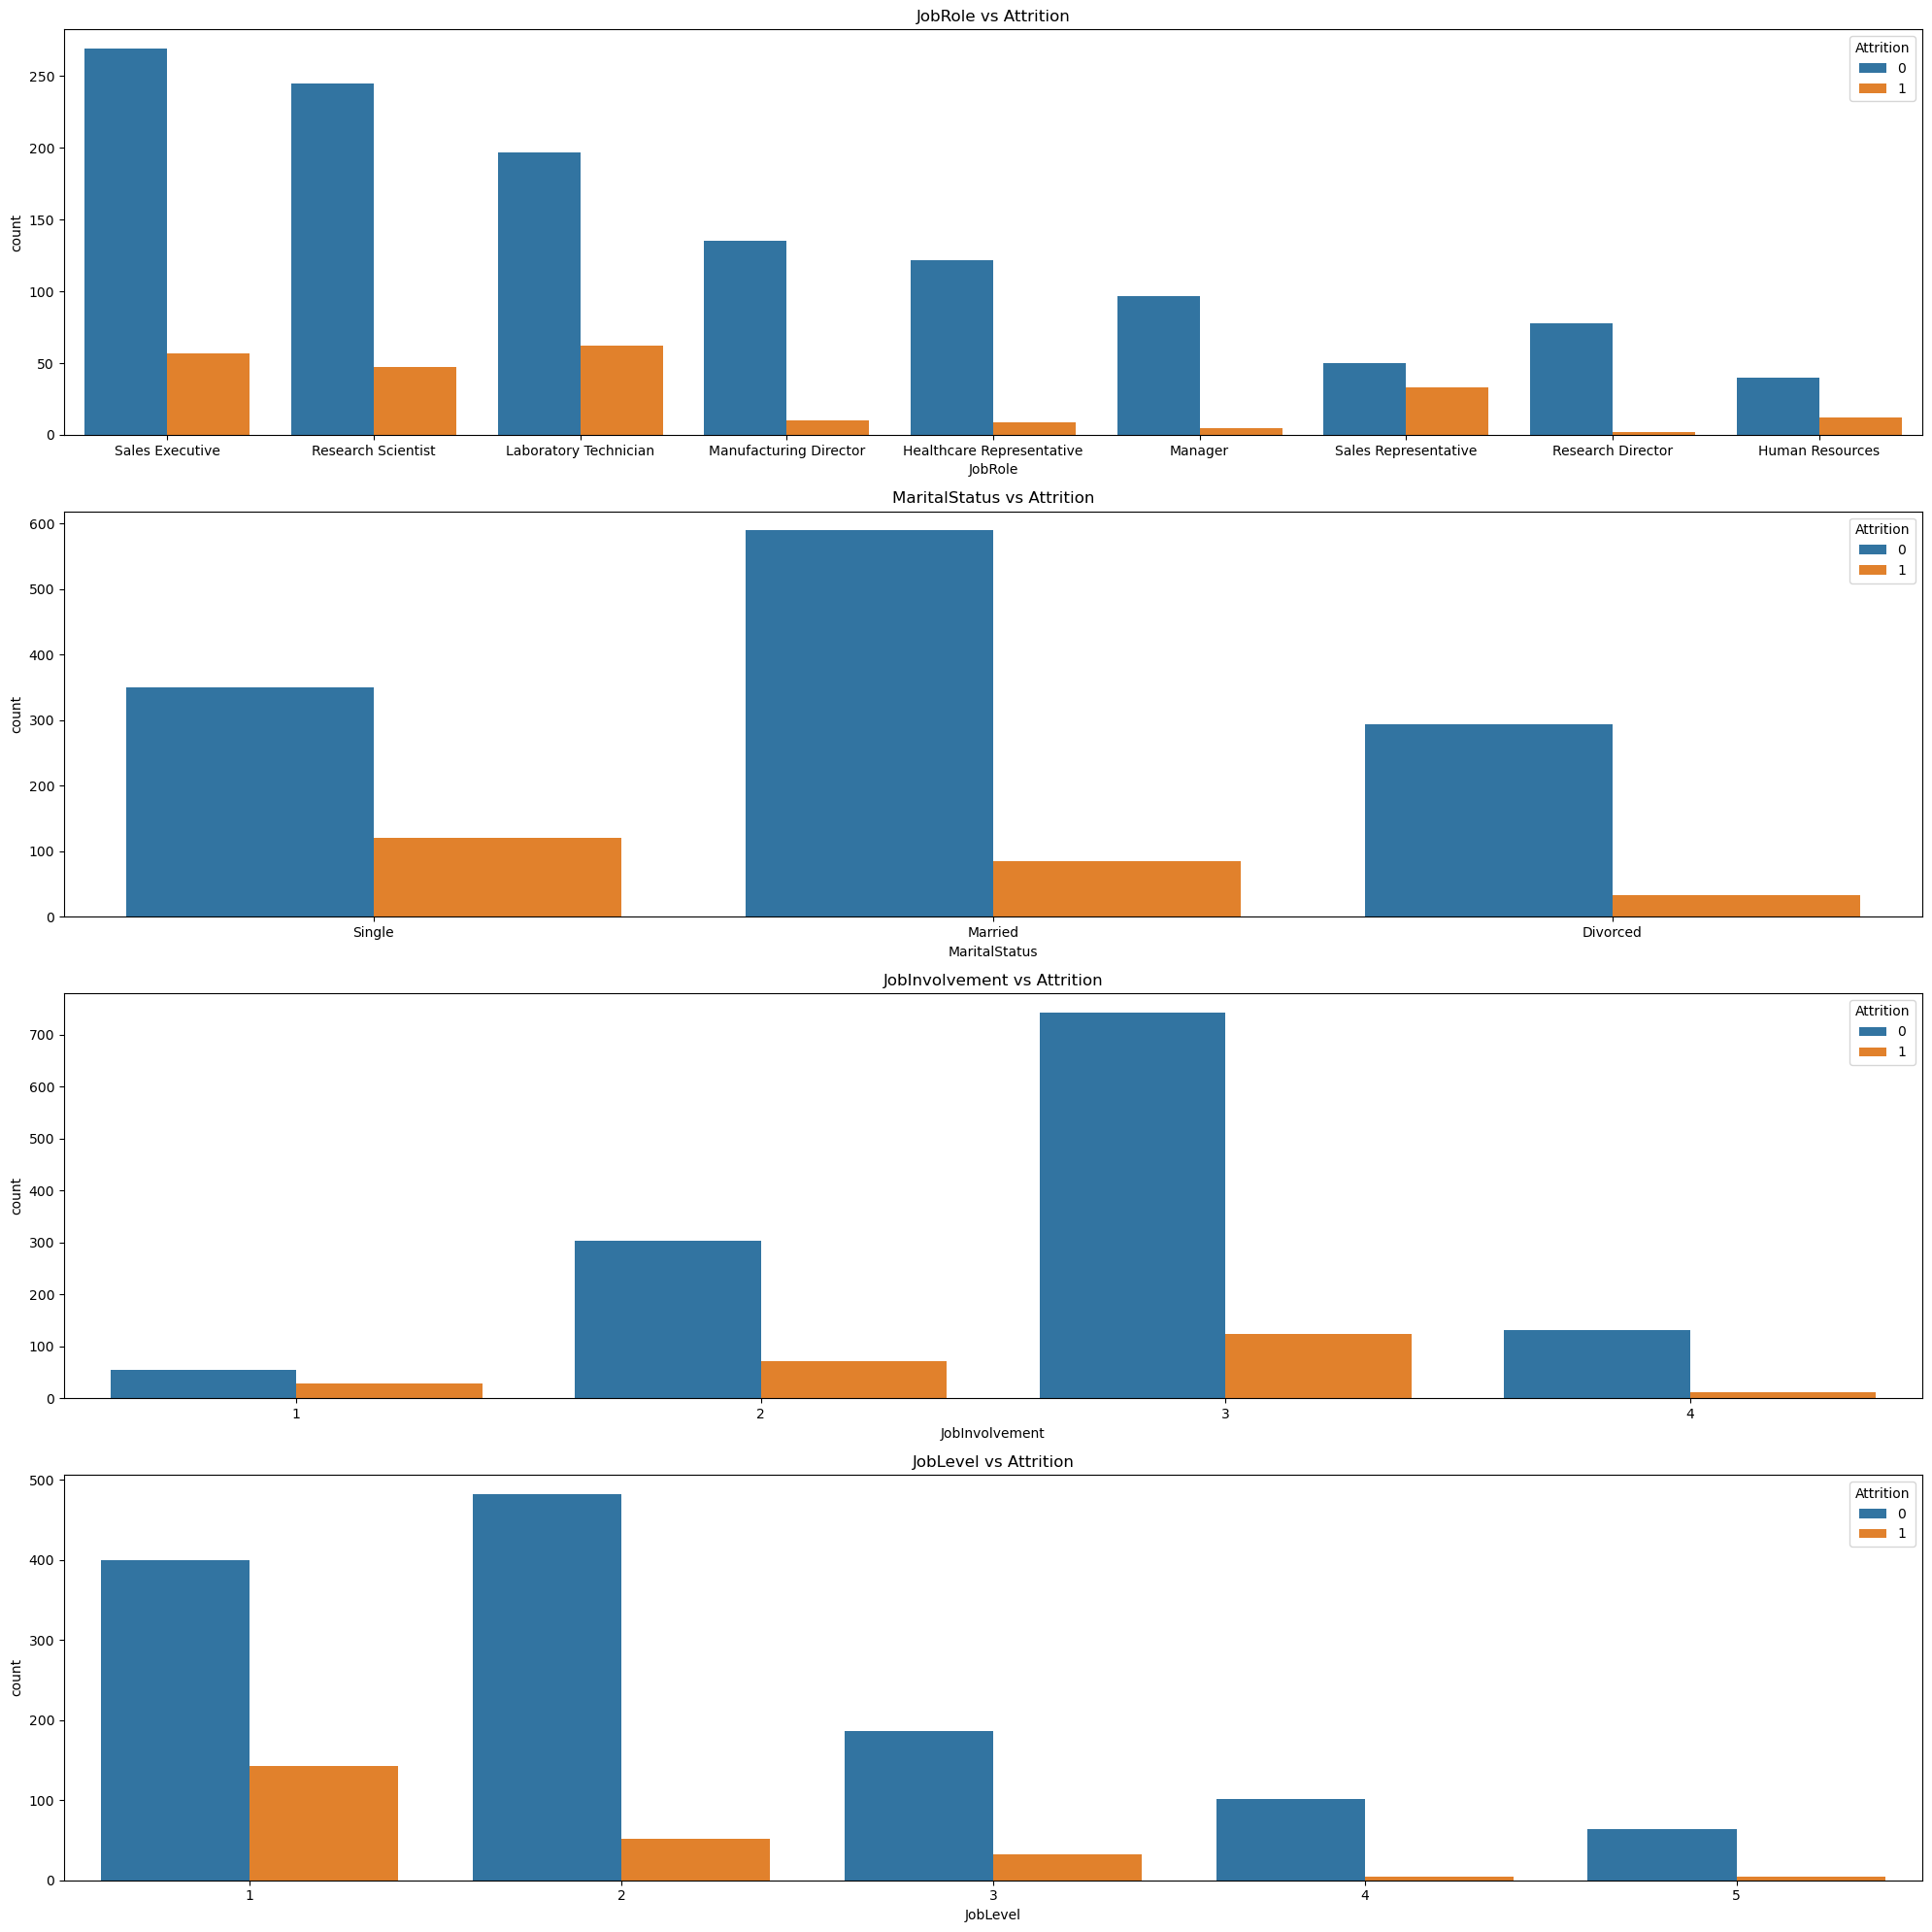

In [27]:
plt.figure(figsize=(20, 20))

# First subplot
plt.subplot(4, 1, 1)
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('JobRole vs Attrition')

# Second subplot
plt.subplot(4, 1, 2)
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('MaritalStatus vs Attrition')

# Third subplot
plt.subplot(4, 1, 3)
sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
plt.title('JobInvolvement vs Attrition')

# Fourth subplot
plt.subplot(4, 1, 4)
sns.countplot(x='JobLevel', hue='Attrition', data=df)
plt.title('JobLevel vs Attrition')

# Adjust layout
plt.tight_layout()
plt.show()


# Obersvations from the plots
1. Sales representatives have the highest turnover rate
2. Single employees leave the company more often
3. Less involved employees tend to leave the company
4. Low job level employees tend to leave the comapany

# KDE
## Kernel Density Estimate
- Useful for visualising PDF of continuous R.V
- Smoothing out a histogram and is controlled by bandwidth

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

Text(0.5, 0, 'Distance from Home')

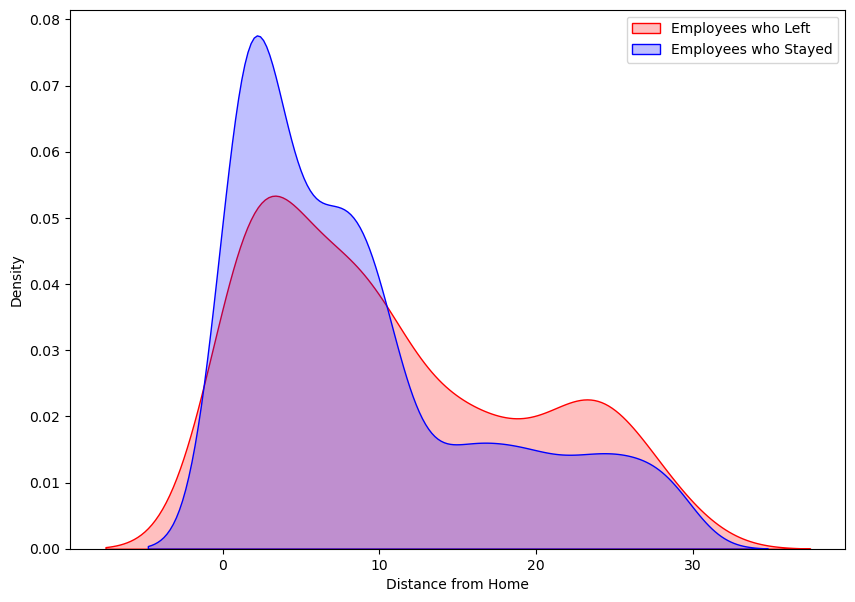

In [38]:
plt.figure(figsize=(10,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who Left', fill = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', fill = True, color = 'b')
plt.xlabel('Distance from Home')
plt.legend()
plt.show()

As distance increases, the number of employees that leave > employees that stay.

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Employee Attrition w.r.t Total Working Years')

Text(0.5, 0, 'Total Working Years')

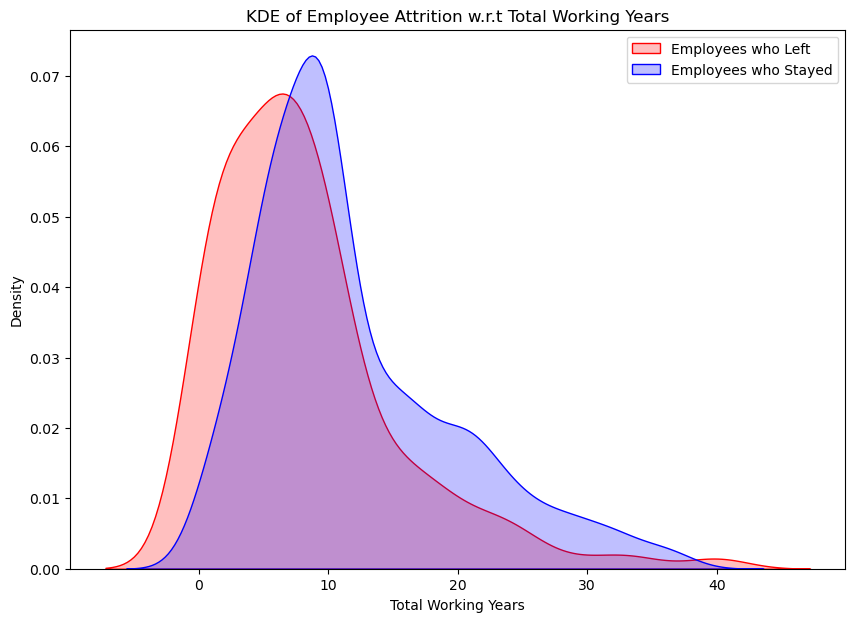

In [39]:
plt.figure(figsize=(10,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who Left', fill = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who Stayed', fill = True, color = 'b')
plt.title('KDE of Employee Attrition w.r.t Total Working Years')
plt.xlabel('Total Working Years')
plt.legend()
plt.show()

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Employee Attrition w.r.t Years With Curr Manager')

Text(0.5, 0, 'Years With Curr Manager')

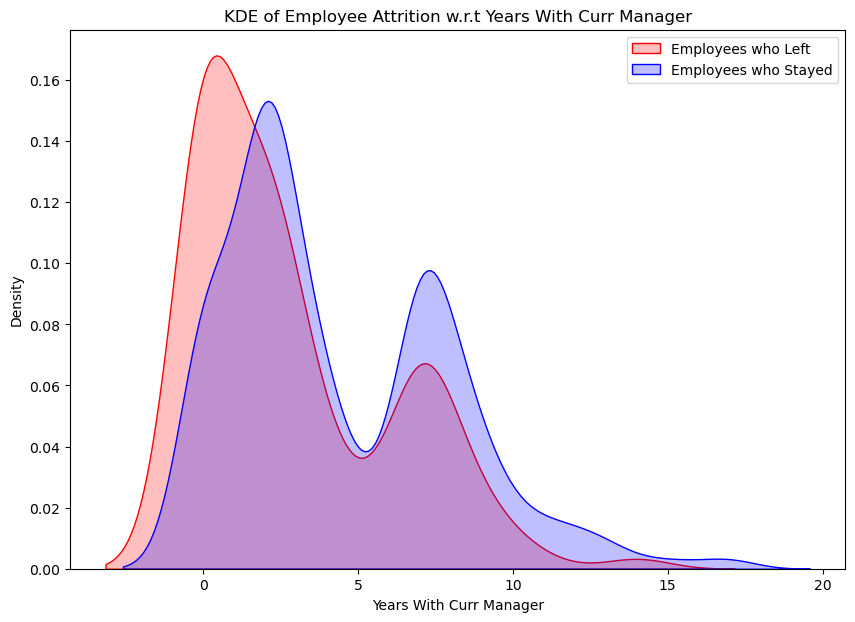

In [40]:
plt.figure(figsize=(10,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who Left', fill = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', fill = True, color = 'b')
plt.title('KDE of Employee Attrition w.r.t Years With Curr Manager')
plt.xlabel('Years With Curr Manager')
plt.legend()
plt.show()

# Box Plot
## Gender vs Monthly Income

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

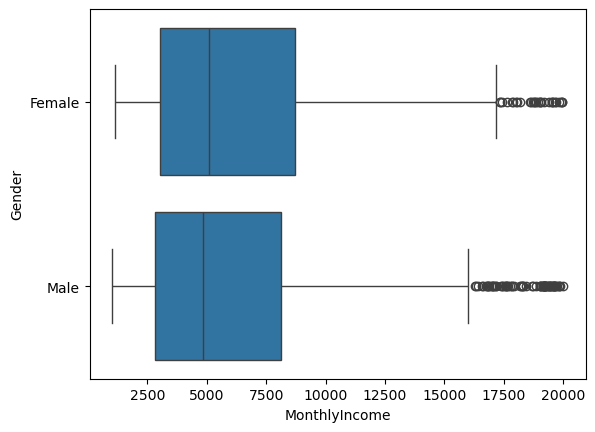

In [42]:
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)

Average monthly salary is about the same
## Job Role vs Monthly Income

<Figure size 2500x1000 with 0 Axes>

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

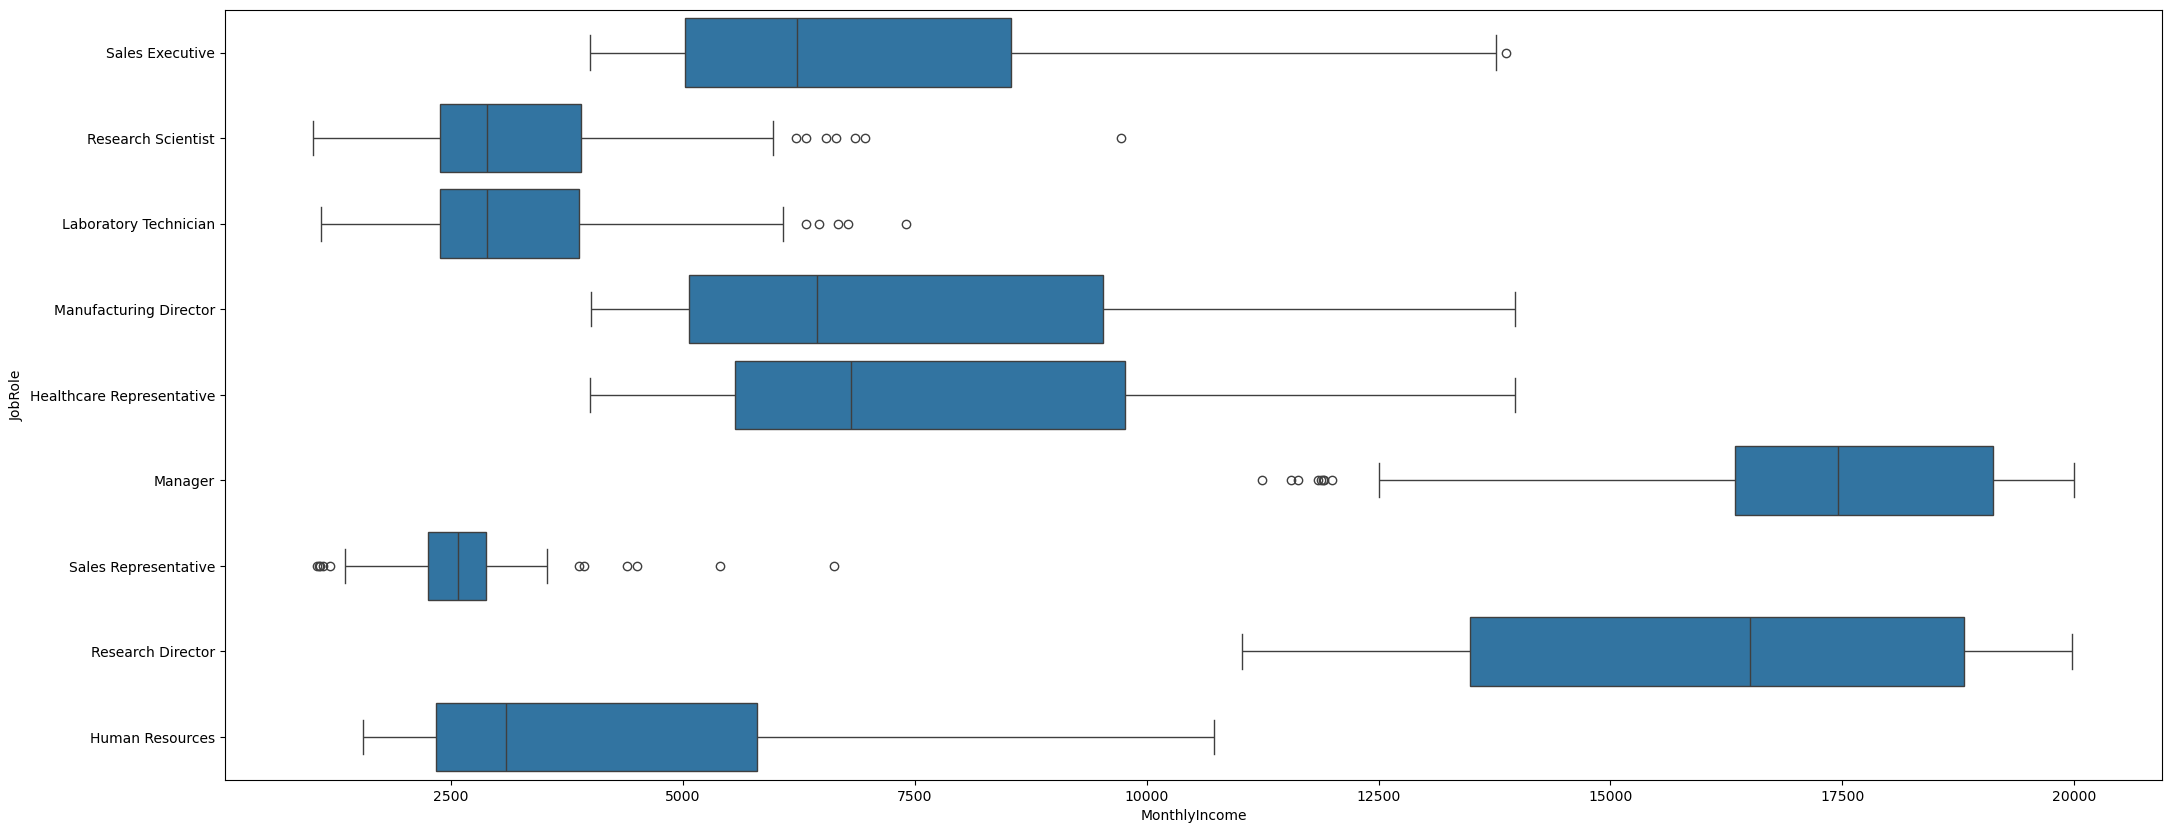

In [52]:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole' ,data = df)

# 1. Create testing and training data set
# 2. Data Cleaning

In [53]:
# Take all categorical data and separate it from the rest of the data

In [54]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [61]:
X_cat = df[['BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [73]:
onehotencoder = OneHotEncoder()

SyntaxError: invalid character '’' (U+2019) (2171112905.py, line 4)

Purpose: The categorical variables are one-hot encoded, which means each category is converted into a binary vector. For example, if Gender has categories "Male" and "Female", one-hot encoding will create two new columns: Gender_Male and Gender_Female.

Intuition: One-hot encoding is used to avoid introducing artificial ordinal relationships into the data. For instance, labeling "Male" as 0 and "Female" as 1 would imply an ordinal relationship that doesn’t exist. One-hot encoding ensures that each category is treated independently.

In [64]:
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [67]:
X_cat.shape

(1470, 26)

In [68]:
X_cat = pd.DataFrame(X_cat)

In [69]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [70]:
X_numerical = df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [72]:
X_all = pd.concat([X_cat, X_numerical], axis=1)

In [78]:
# Scale the data so that the features are not so skewed, ML techniques treat the features equally
X_all.columns = X_all.columns.astype(str)

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [80]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [81]:
y = df['Attrition']

In [82]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64